In [1]:
#importing modules

#####################################################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#####################################################################


#importing our final dataset, which i saved into a csv file in datasets folder

final_data = pd.read_csv('../datasets/fData.csv')




In [2]:
final_data = final_data.iloc[:,1:]
#slicing fips codes and redundant column before i calculate the corr coefs

In [3]:
final_data

,FIPS,agi_stub,N1,MARS1,MARS2,MARS4,NUMDEP,A00100,A02650,total_people,agi_per_person,State,County,"Population Estimate, 2013",PCT_DIABETES_ADULTS13,PCT_OBESE_ADULTS13,FOODINSEC_13_15,VLFOODSEC_13_15
0,1001,1,11670.0,6490.0,1350.0,3690.0,8320.0,151738.0,154057.0,17510.0,8.665791,AL,Autauga,54792.0,13.0,34.1,17.6,7.3
1,1001,2,6170.0,2340.0,1860.0,1780.0,5060.0,221418.0,223660.0,11120.0,19.911691,AL,Autauga,54792.0,13.0,34.1,17.6,7.3
2,1001,3,3510.0,890.0,2060.0,510.0,2930.0,216765.0,218614.0,7940.0,27.300378,AL,Autauga,54792.0,13.0,34.1,17.6,7.3
3,1001,4,2490.0,310.0,2020.0,120.0,2350.0,214326.0,215946.0,6700.0,31.988955,AL,Autauga,54792.0,13.0,34.1,17.6,7.3
4,1001,5,2760.0,130.0,2540.0,50.0,2860.0,364264.0,367190.0,8070.0,45.138042,AL,Autauga,54792.0,13.0,34.1,17.6,7.3
5,1001,6,260.0,0.0,250.0,0.0,260.0,87312.0,89083.0,760.0,114.884211,AL,Autauga,54792.0,13.0,34.1,17.6,7.3
6,1003,1,33160.0,20150.0,5490.0,6890.0,16340.0,416315.0,424960.0,47470.0,8.770065,AL,Baldwin,195147.0,10.4,27.4,17.6,7.3
7,1003,2,18920.0,7950.0,6870.0,3500.0,11820.0,683061.0,691857.0,33510.0,20.383796,AL,Baldwin,195147.0,10.4,27.4,17.6,7.3
8,1003,3,11280.0,3190.0,6930.0,1000.0,7710.0,695870.0,704334.0,24760.0,28.104604,AL,Baldwin,195147.0,10.4,27.4,17.6,7.3
9,1003,4,7550.0,1070.0,6100.0,360.0,5730.0,656925.0,665121.0,19000.0,34.575000,AL,Baldwin,195147.0,10.4,27.4,17.6,7.3


In [4]:
# function to create the correlation heatmap for a dataframe
def createHeatMapForAgi(df,i):
    corelation_matrix = df.corr()
    plt.figure(figsize = (8,3))
#     plt.subplot(1,8,2)
    sns.heatmap(corelation_matrix, xticklabels=['Income','Diabetes','Obesity'], yticklabels=['Income','Diabetes','Obesity'], annot=True,linewidth = 0.5)
#     a.savefig('C:/Users/jatin/Downloads/heatmap'+i+'.eps')
#     figure = a.get_figure()    
#     figure.savefig('C:/Users/jatin/Downloads/heatmap'+str(i)+'.png', dpi=1600)

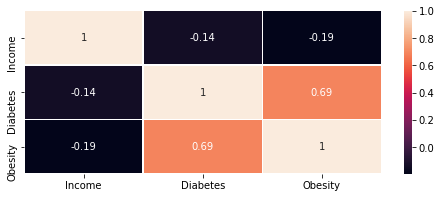

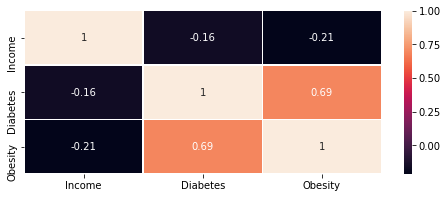

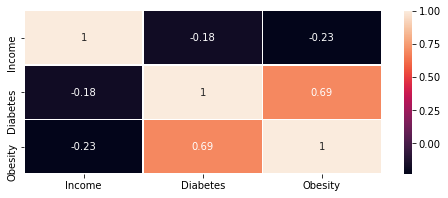

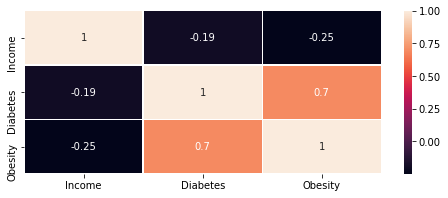

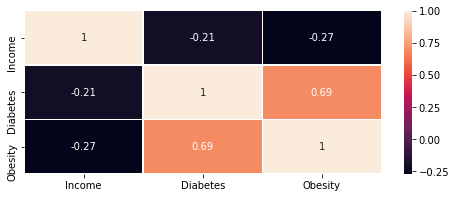

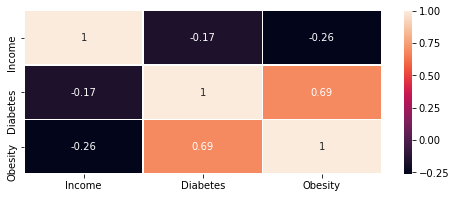

In [5]:
# ##generate heatmap for different agi_stub, observe the negative values in the matrix, of health data and the income data, 
# ##which does indicate that increase in wealth is decreaseing the diabetes and obesity
# needed_columns = ['agi_per_person','PCT_DIABETES_ADULTS13','PCT_OBESE_ADULTS13']
# agi_stub_i = (final_data.loc[final_data['agi_stub'] == 1])[needed_columns]
# createHeatMapForAgi(agi_stub_i)

for i in range(1,7):
    needed_columns = ['A00100','PCT_DIABETES_ADULTS13','PCT_OBESE_ADULTS13']
    agi_stub_i = final_data.loc[final_data['agi_stub'] == i][needed_columns]
#     print(agi_stub_i)
    createHeatMapForAgi(agi_stub_i,i)



